# Analysis of Personal Pronouns in *The Garden Party and Other Stories*

## Saanvi Nandanwar

13 August 2022

Introduction to Computational Literary Analysis

Department of Digital Humanities, University of California, Berkeley

Instructor: Jonathan Reeve

### Introduction 

For my project I decided to take a look at all of short stories from *The Garden Party and Other Stories* collection by Katherine Mansfield. After reading some of these stories for the past few weeks and discussing them together as a class, I thought it would be a cool project idea to analyze the personal pronouns used in these stories and determine whether there are any correlations between their frequencies and the themes and styles of this collection. Especially by comparing the similarities and differences of the stories that I have not read with the ones that I have, I will be able to draw some conclusions about the contents of the stories and whether the pronouns are indicative of the character roles in each story. I also want to do some stylometric analysis using these pronouns and see how it compares to a normal stylometric analysis of each of the short stories. 


In [6]:
import pandas as pd 
import nltk
from nltk.corpus import wordnet as wn
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import sklearn 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from nltk.corpus import gutenberg

Before being able to do any actual analysis on the texts, I first had to load the data and sort through it to separate all of the stories, which I did in the next three cells. After lowercasing all of the text (so that later when it is tokenized 'She' and 'she' are considered to be the same word), I split up the large string into the individual stories, and then zipped all those strings into a dictionary with the keys being the titles of all the stories. Afterwards I iterated through all of the stories in the dictionary `storiesLowered` and tokenized each story, making sure to keep only the words and getting rid of all the punctuation, since it is not relevant to the analysis I am conducting. Then I found the length of each story and created two new dictionaries, one called `storyLengths` that stored the lengths of all the stories and another called `alpha_token_dict` that stored all the alphabetical tokens for each story as an individual list. 

In [7]:
garden = open('garden-party.md.txt').read()
gardenLowered = garden.lower()

gardenSplit = gardenLowered.split('# ')
at_the_bay = ''.join(gardenSplit[1:16])
garden_party = ''.join(gardenSplit[16])
daughters_colonel = ''.join(gardenSplit[17:30])

stories = {"At the Bay": at_the_bay, "Garden Party": garden_party, "The Daughters of the Late Colonel": daughters_colonel}

titles = ['Mr. and Mrs. Dove', 'The Young Girl', 'Life of Ma Parker', 'Marriage a la Mode', 'The Voyage', 'Miss Brill', 'Her First Ball', 
          'The Singing Lesson', 'The Stranger', 'Bank Holiday', 'An Ideal Family', 'The Lady’s Maid']
stories2 = {title: text for title, text in zip(titles, gardenSplit[30:43])}

stories.update(stories2)

storiesLowered = stories

In [8]:
lengths = []
alpha_tokens = []  #has the words (no punctuation) for each story as lists stored in a list
storiesLoweredTokenized = {}
for story in storiesLowered: 
    storiesLoweredTokenized[story] = nltk.word_tokenize(storiesLowered[story])
    words = []
    for token in storiesLoweredTokenized[story]:
        if token.isalpha():
            words.append(token)
    lengths.append(len(words))
    alpha_tokens.append(words)

titles = ["At the Bay", "Garden Party", "The Daughters of the Late Colonel", 'Mr. and Mrs. Dove', 'The Young Girl', 'Life of Ma Parker', 
          'Marriage a la Mode', 'The Voyage', 'Miss Brill', 'Her First Ball', 'The Singing Lesson', 'The Stranger', 'Bank Holiday', 
          'An Ideal Family', 'The Lady’s Maid']

storyLengths = {title: text for title, text in zip(titles, lengths)}

In [9]:
alpha_token_dict = {title: text for title, text in zip(titles, alpha_tokens)}

To get the frequencies for each of the pronouns, first I made a table with the occurrences of each token in all of the stories, as shown down below. To do this, I used the Counter subclass to find the counts of each token in each story, and then made a dictionary that stored these counts with the story titles, and finally converted that dictionary into a dataframe table. I printed out the first five rows of this dataframe below.

In [28]:
def counted(tokens): 
    counted = Counter(tokens)
    return counted 

counts = []
for story in alpha_token_dict: 
    counts.append(counted(alpha_token_dict[story]))

counts_dict = {title: text for title, text in zip(titles, counts)}

table1 = pd.DataFrame(counts_dict).fillna(0)   #this dataframe object takes any kind of data structure that is 2D and tries to make it a dataframe
table1.head(5)

,At the Bay,Garden Party,The Daughters of the Late Colonel,Mr. and Mrs. Dove,The Young Girl,Life of Ma Parker,Marriage a la Mode,The Voyage,Miss Brill,Her First Ball,The Singing Lesson,The Stranger,Bank Holiday,An Ideal Family,The Lady’s Maid
at,83.0,39.0,63.0,26.0,16.0,11.0,26.0,24.0,15.0,21.0,7.0,38.0,4.0,17.0,17.0
the,757.0,290.0,235.0,147.0,83.0,132.0,204.0,166.0,110.0,143.0,103.0,244.0,79.0,129.0,81.0
bay,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chapter,13.0,0.0,12.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
very,43.0,17.0,42.0,5.0,7.0,7.0,10.0,6.0,2.0,4.0,8.0,4.0,0.0,8.0,1.0


However, since what we want is the frequencies of personal pronouns, I divided each of the columns, which represent different stories, by the lengths of each of the short stories, which were stored in the list appropriately labeled `lengths`. After that, I also created another column titled `average`, which is the average frequency of each token, calculated by finding the average of the frequencies for all fifteen stories. Then I sorted this table by the average values, so that the tokens that appear the most frequently in all of the texts, on average, are at the top of the table. Then I printed the twenty tokens at the top of the table. As we can see, the pronouns 'she' and 'her' are both in the top ten, with 'he' appearing in eleventh place and 'his' appearing at the end of the display. I found it really interesting that the male possessive pronoun 'his' appeared before 'him', which was not even in the top twenty. 

From this table, we can make a couple of insightful connections. It seems that for both male and female pronouns, they are used more frequently as a subject of a sentence than as the object, which we can tell because 'she' appears higher on the table than 'her', and 'he' appears on this table before 'him' (which is not even on this table). In fact, for most of the stories, the word 'she' appears more frequently than 'her.' This might be because of a tendency to replace the pronoun 'her' with the character's name when they are the object of a sentence. For example, let us take this short passage from "At the Bay"
```quote
"What had she done now? She had only dug a river down the middle of her porridge, filled it, and was eating the banks away. But she did that every single morning, and no one had said a word up till now. 'Why can’t you eat your food properly like Isabel and Lottie?'"
```

We can see here that when female characters are the subject of a sentence, the personal pronoun 'she' is used. However, when female characters become the object of a sentence, such as Isabel, they are referred to by name. One exception to this observation is the story 'Bank Holiday,' in which the opposite is true. Let's take a look at this quote from the short story: 
```quote
"But he doesn’t want her to eat them, either. He likes to watch her little frightened face, and her puzzled eyes lifted to his: 'Aren’t they a price!' He pushes out his chest and grins. Old fat women in velvet bodices—old dusty pin-cushions—lean old hags like worn umbrellas with a quivering bonnet on top; young women, in muslins, with hats that might have grown on hedges, and high pointed shoes"
```
Here, the female characters are referred to with physical descriptions instead of by their personal pronouns, while the male character is referred to as 'he' multiple times in the story. 

In [31]:
word_freq = table1/lengths
word_freq['average'] = word_freq.mean(axis=1)
word_freq_sorted = word_freq.sort_values(by="average", ascending=False)
word_freq_sorted.head(20)

,At the Bay,Garden Party,The Daughters of the Late Colonel,Mr. and Mrs. Dove,The Young Girl,Life of Ma Parker,Marriage a la Mode,The Voyage,Miss Brill,Her First Ball,The Singing Lesson,The Stranger,Bank Holiday,An Ideal Family,The Lady’s Maid,average
the,0.058370,0.055759,0.034332,0.044640,0.039543,0.053312,0.054839,0.053566,0.057561,0.056388,0.050990,0.056403,0.066109,0.055152,0.039784,0.051783
and,0.033310,0.028648,0.025128,0.036745,0.024297,0.032310,0.031452,0.037109,0.040816,0.031151,0.023267,0.027970,0.038494,0.035058,0.035363,0.032075
a,0.027681,0.023265,0.022060,0.015791,0.026679,0.028675,0.025000,0.032914,0.026688,0.019716,0.024257,0.016875,0.052720,0.017956,0.021611,0.025459
to,0.022207,0.022688,0.028342,0.019435,0.023344,0.025444,0.022849,0.021943,0.017268,0.028391,0.026733,0.027970,0.010879,0.023942,0.027014,0.023230
she,0.016270,0.026149,0.023959,0.020650,0.038113,0.031099,0.015591,0.021620,0.030874,0.018533,0.020792,0.018493,0.004184,0.008551,0.019646,0.020968
was,0.023055,0.016535,0.016801,0.021561,0.015722,0.022213,0.016667,0.019038,0.026164,0.019322,0.007921,0.022885,0.001674,0.018811,0.025049,0.018228
it,0.018968,0.016535,0.021768,0.023990,0.013816,0.014943,0.015054,0.015489,0.020931,0.017744,0.017822,0.013638,0.013389,0.014964,0.026523,0.017705
her,0.015884,0.015574,0.013294,0.020346,0.030014,0.023021,0.007527,0.024847,0.017792,0.023265,0.019802,0.015719,0.007531,0.008123,0.017191,0.017329
of,0.019123,0.014997,0.016070,0.022776,0.010481,0.016155,0.010484,0.016780,0.014652,0.013013,0.017327,0.013176,0.019247,0.014109,0.015717,0.015607
i,0.008867,0.010383,0.012126,0.018828,0.033826,0.005654,0.010484,0.006776,0.001047,0.007886,0.009406,0.012483,0.004184,0.006413,0.058448,0.013787


In [22]:
she_freq = []
her_freq = []
he_freq = []
him_freq = []

for story in word_freq:
    she_freq.append(word_freq_sorted[story][4])
    her_freq.append(word_freq_sorted[story][7])
    he_freq.append(word_freq_sorted[story][10])
    him_freq.append(word_freq_sorted[story][40])
print("she freq: " + str(she_freq) + "\n")
print("her freq: " + str(her_freq) + "\n")
print("he freq: " + str(he_freq) + "\n")
print("him freq: " + str(him_freq) + "\n")

she freq: [0.0162695658878865, 0.026148817535089405, 0.0239590942293645, 0.02064986334649256, 0.038113387327298714, 0.031098546042003232, 0.015591397849462365, 0.021619877379799937, 0.03087388801674516, 0.018533123028391166, 0.020792079207920793, 0.01849283402681461, 0.0041841004184100415, 0.008550662676357419, 0.019646365422396856, 0.020968240159628882]

her freq: [0.015884031151206724, 0.015573928090751778, 0.013294375456537619, 0.02034618888551473, 0.03001429252024774, 0.023021001615508886, 0.007526881720430108, 0.02484672474991933, 0.017791732077446363, 0.02326498422712934, 0.019801980198019802, 0.01571890892279242, 0.007531380753138075, 0.008123129542539546, 0.01719056974459725, 0.01732867397705198]

he freq: [0.01118050736371347, 0.005575850797923477, 0.009349890430971512, 0.024293956878226542, 0.009528346831824679, 0.016962843295638127, 0.012903225806451613, 0.00451758631816715, 0.0057561486132914706, 0.009069400630914827, 0.005940594059405941, 0.032362459546925564, 0.0075313807

In the cell below I created a few graphs to visualize the data that had been in the dataframe just a few cells above, both in a stacked bar format and the more conventional bar format. Instead of using all of the personal pronouns, I decided to simplify it a bit for this section of the project and just graph the frequencies for the words 'her', 'she', 'he', and 'him', comparing the male and female third person pronouns for each of the fifteen stories. We can immediately notice that for almost all of the stories, the frequency of 'she' seems to be the highest, followed by 'her' and then 'he', which is consistent with our data table. The stories that ignore this trend are 'Mr. and Mrs. Dove,' 'The Stranger,' and 'An Ideal Family.' which have the largest frequency for the token 'he.' Another interesting story here is 'Bank Holiday,' which seems to have less frequent usage of all the pronouns, and the same frequency for 'her' and 'he.' These ratios could be indicative of the roles that male and female characters play in each story. The stories with higher proportions of male personal pronouns could likely have a man as the main character in the story. For example, here is an excerpt about the main character from 'An Ideal Family'

```quote
'In the front of the crowd a strong-looking, middle-aged man, dressed very well, very snugly in a grey overcoat, grey silk scarf, thick gloves and dark felt hat, marched up and down, twirling his folded umbrella.'
```



<AxesSubplot:title={'center':'Pronouns in The Garden Party and Other Short Stories'}, xlabel='Stories'>

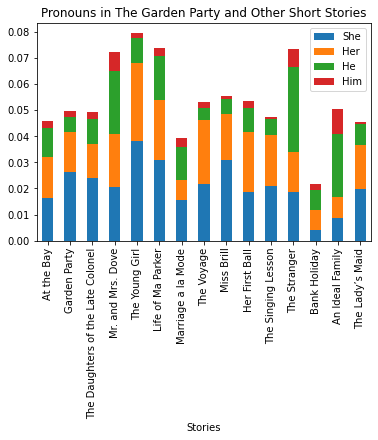

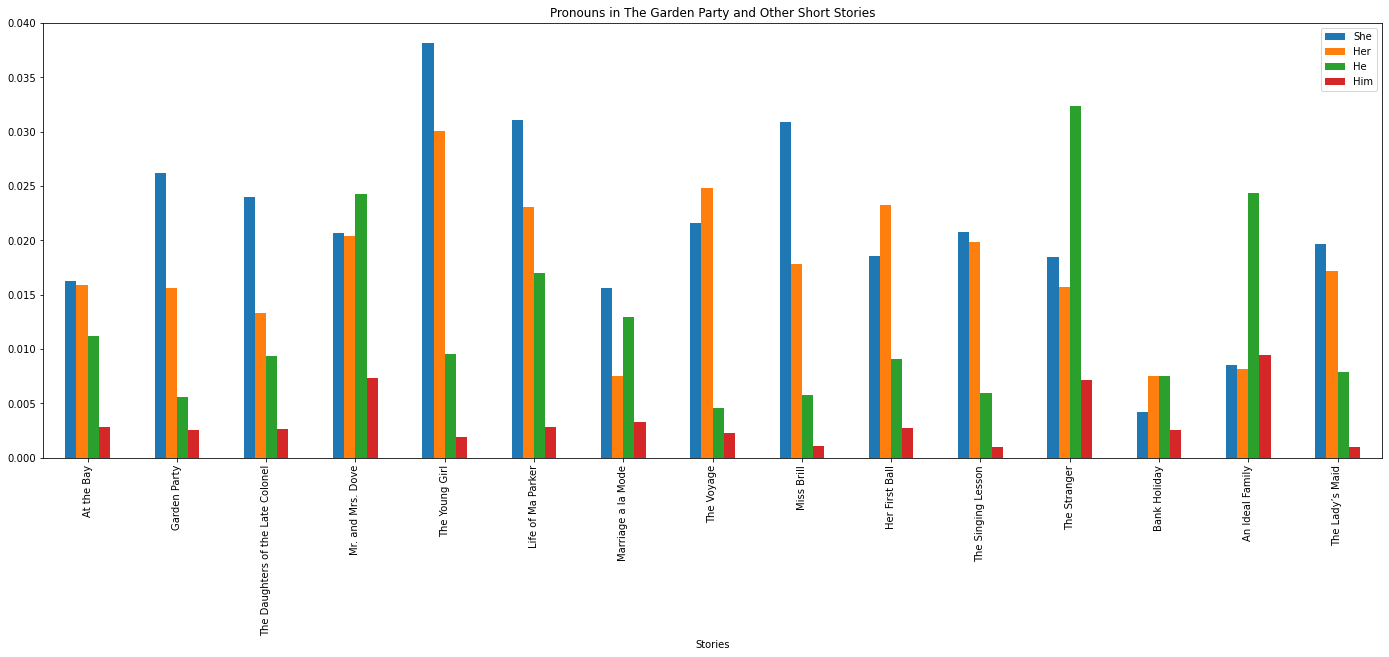

In [32]:
she_freq = she_freq[:15]
he_freq = he_freq[:15]
him_freq = him_freq[:15]
her_freq = her_freq[:15]

data = {'Stories': titles, 'She': she_freq, 'Her': her_freq, "He": he_freq, "Him": him_freq}

# Create DataFrame
df = pd.DataFrame(data)
  
# plot data in stack manner of bar type
df.plot(x='Stories', kind='bar', stacked=True,
            title='Pronouns in The Garden Party and Other Short Stories')
df.plot(x='Stories', kind='bar', stacked=False,
            title='Pronouns in The Garden Party and Other Short Stories', figsize = (24,8))

In [34]:
tagged_stories = []
for each_list in alpha_tokens: 
    tagged = nltk.pos_tag(each_list)
    tagged_stories.append(tagged)

tagged_stories_dict = {title: text for title, text in zip(titles, tagged_stories)}

In addition to the four personal pronouns that were graphed above, I wanted to create a dictionary that included all of the personal pronouns that appeared in each of the stories, including tokens such as 'they', 'them', and 'it'. To do this, I did a part of speech tag for each of the tokens from all the stories, and then kept only the tokens that were tagged as personal pronouns and added them to a new dictionary called `pp_dict`, so that all the personal pronouns for each story would be kept together in lists with the keys being the story's title. In the cell below I have printed out twenty five of the personal pronouns from each of the fifteen stories, so that we could get an idea of the distributions of all the pronouns from the small sample that we have. Immediately we can see that the occurances of the third person plural pronouns such as 'they' and 'them', along with the pronoun 'it' are quite frequent in these lists. For these pronouns, it is essentially impossible to tell who they are referring to without the context, but thankfully we can see some similarities between this printout below and the two graphs above for the male and female pronouns. For example, if we look at the printout for 'The Singing Lesson,' we can see how there are several occurrences for both 'she' and 'her,' while there are no male pronouns present in this list of length twenty-five. This is consistent with the graph above, where we can observe that for this story the frequency of female pronouns is a lot higher than that of their male counterparts. On the other hand, one of the stories here that surprised me was 'The Young Girl.' On the graphs above, we can see how the frequencies of 'she' and 'her' seem to be a lot greater, but in the list below the occurances of the pronouns for both genders seem to be roughly the same. 

However, the main reason that I tagged each of the tokens for part of speech is yet to come, and will be analyzed more in depth when reviewing the stylometry graphs for the pronouns of each story. 

In [47]:
personal_pronouns_per_story = []
for title in tagged_stories_dict:                                                                        
    personal_pronouns = []
    for sets in tagged_stories_dict[title]: 
        if sets[1] == 'PRP': 
            personal_pronouns.append(sets[0])
    personal_pronouns_per_story.append(personal_pronouns)
    
pp_dict = {title: text for title, text in zip(titles, personal_pronouns_per_story)}

for story in pp_dict:
    print(story, pp_dict[story][:25])
    print('')

At the Bay ['you', 'they', 'it', 'them', 'it', 'you', 'you', 'it', 'it', 'they', 'them', 'them', 'himself', 'he', 'he', 'he', 'they', 'them', 'they', 'it', 'they', 'he', 'it', 'it', 'it']

Garden Party ['they', 'they', 'it', 'it', 'them', 'you', 'they', 'they', 'you', 'it', 'me', 'you', 'me', 'she', 'she', 'you', 'you', 'it', 'she', 'she', 'she', 'it', 'they', 'they', 'they']

The Daughters of the Late Colonel ['they', 'it', 'she', 'you', 'we', 'he', 'he', 'she', 'he', 'we', 'him', 'he', 'she', 'she', 'it', 'they', 'she', 'her', 'she', 'it', 'she', 'we', 'she', 'she', 'you']

Mr. and Mrs. Dove ['he', 'he', 'he', 'he', 'it', 'he', 'him', 'it', 'he', 'she', 'he', 'he', 'it', 'he', 'her', 'he', 'he', 'she', 'he', 'he', 'him', 'he', 'he', 'him', 'he']

The Young Girl ['her', 'she', 'it', 'she', 'she', 'you', 'you', 'you', 'we', 'you', 'she', 'it', 'it', 'she', 'you', 'you', 'they', 'he', 'he', 'they', 'they', 'he', 'he', 'they', 'they']

Life of Ma Parker ['he', 'she', 'she', 'we', 'she', 

In [37]:
def getHypernymLevel (word, num): 
    synsets = wn.synsets(word)
    if len(synsets) > 0: 
        synset = synsets[0]
        while synset.min_depth() > (num+1): 
            hypernyms = synset.hypernyms()
            if len(hypernyms) > 0:
                synset = hypernyms[0]
            else: 
                break  #tells while loop to stop
        return synset
    else: 
        return None

In [38]:
person = wn.synsets('person')[0]
person

Synset('person.n.01')

Before doing comparative stylometry for the pronouns in each story and just the stories as a whole, I thought that it could be interesting to also take a look at all of the characters that fit under the synset of person - `Synset('person.n.01')` - and see if there is a relationship between the pronouns frequencies and the tokens that pop up. To do this, I iterated through all of the tokens in each of the stories and called the function `isPerson` for each token, which in turn called the function `getHypernymLevel` to find out whether the token was in the specified synset. After noticing that some of the tokens were not actually people but other miscellaneous words, I also took out those tokens from the lists, but there might still be a few tokens that are not actually people. After creating lists of 'people' tokens for each story, I made a dictionary called `people_stories_dict` to store each list of tokens with a key that is the title of the story. 

In [39]:
def isPerson(word):
    '''Give it a word and it tells you if it's a person'''
    hypernym = getHypernymLevel(word, 2)
    if hypernym is not None: 
        return getHypernymLevel(word, 2) == person
    else:
        return False

In [40]:
peopleCounts = []
people_in_stories = []
for stories in alpha_token_dict: 
    count = 0
    people_tokens = []
    for token in alpha_token_dict[stories]:
        if isPerson(token):
            if token != 'white' and token != 'heavy' and token != 'have' and token != 'same' and token != 'wag':
                people_tokens.append(token)
                count += 1
    peopleCounts.append(count)
    people_in_stories.append(people_tokens)

In the cell below we can see the printout of forty 'people' tokens for each of the stories. Unsurprisingly, some of the stories that had more female pronouns, such as “The Lady’s Maid,” also have lots of female tokens such as “madam”, “maid”, and “lady.” On the other hand, “Bank Holiday” seems to have more male than female tokens here, such as the common occurrence of ‘chap’ and ‘doctor’. (While doctors are not inherently male, given the setting of this story, it is most likely that this token is referring to a man and not a woman.) We can also see the prevalence of male references in 'Mr. and Mrs. Dove,' with tokens such as 'father,' 'uncle,' 'son,' and 'colonel.' In 'The Voyage' we can also see the abundance of tokens 'grandma' and 'mother,' as well as the frequent occurrence of the word 'father.' This story, along with a couple others that have both female and male characters listed below, could also indicate that even though the frequency of male and female personal pronouns are very different for most stories, when referring to the people in other ways the distribution becomes more even. 

In [45]:
people_stories_dict = {title: text for title, text in zip(titles, people_in_stories)}

for story in people_stories_dict:
    print(story, people_stories_dict[story][:40])
    print('')

At the Bay ['shepherd', 'man', 'ancient', 'master', 'forward', 'shepherd', 'shepherd', 'man', 'sleeper', 'darling', 'inhabitant', 'silly', 'shepherd', 'fisherman', 'gran', 'shepherd', 'shepherd', 'dear', 'man', 'souse', 'brother', 'great', 'fellow', 'man', 'fool', 'friend', 'fellow', 'idiot', 'man', 'longer', 'tease', 'fellow', 'cropper', 'stiff', 'mother', 'girls', 'children', 'father', 'grandma', 'mother']

Garden Party ['gardener', 'mother', 'dear', 'child', 'children', 'mother', 'guest', 'mother', 'girl', 'miss', 'fellow', 'workmen', 'chap', 'fellow', 'workman', 'workmen', 'fellow', 'miss', 'lovely', 'broad', 'fellow', 'workmen', 'workmen', 'friends', 'silly', 'boys', 'fellow', 'fellow', 'stupid', 'father', 'sister', 'girl', 'dear', 'dear', 'mother', 'mother', 'mother', 'stiff', 'darling', 'man']

The Daughters of the Late Colonel ['daughters', 'colonel', 'father', 'porter', 'porter', 'porter', 'bowler', 'father', 'father', 'father', 'nobody', 'creep', 'postman', 'favourite', 'miss

Finally we have our last two graphs, which are the stylometric representations of hundreds of words for each story and just the personal pronouns list for each short story, with the personal pronouns graph as the bottom graph. Notice how there are some patterns found in both graphs, such as how “The Stranger,” “Bank Holiday” and “An Ideal Family” are farther away from the other stories on both graphs. This could be because these stories revolve more around male characters, and are different from the rest of the short stories. 'Bank Holiday' in particular seems to be very far off from both graphs, completely isolated from the rest of the short stories. From the first graph of the male and female personal pronouns we all noticed how it was the story with consistent the lowest frequencies for these pronouns, which told us that compared to the other Mansfield stories it does not rely very heavily on personal pronouns. This difference could potentially be indicative of the different stylistic choices in 'Bank Holiday,' which is why it is so far away from all the other stories even when analyzing hundreds of tokens for each of the stories. We can also see how “Garden Party” and “Her First Ball” are close together in both graphs (which may be because both use a lot more female than male person pronouns and deal with the mental changes in the young characters and also have lots of vivid descriptions of the setting), and how "The Young Girl” is off in the left bottom corner. By analyzing these personal pronouns, we can get an idea of the main characters in these stories, and also a rough metric to group potentially related and similar stories together. 

/Users/saanvi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


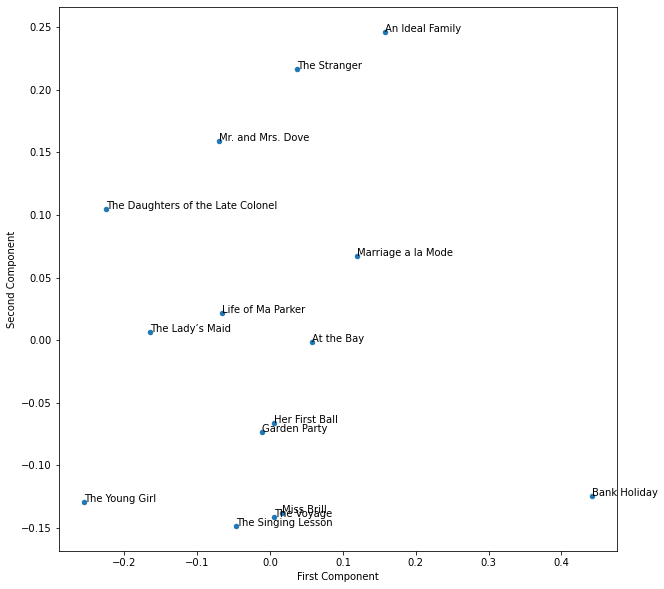

In [42]:
garden_texts = [at_the_bay, garden_party, daughters_colonel, gardenSplit[30], gardenSplit[31], gardenSplit[32], gardenSplit[33], gardenSplit[34], gardenSplit[35], 
                gardenSplit[36], gardenSplit[37], gardenSplit[38], gardenSplit[39], gardenSplit[40], gardenSplit[41]]

tfidfVectorizer = TfidfVectorizer(max_features=800, use_idf=False)
gardenFreq = tfidfVectorizer.fit_transform(garden_texts).todense()
pd.DataFrame(gardenFreq)

pca = PCA(n_components=2)
gardenReduced = pca.fit_transform(gardenFreq)

df = pd.DataFrame(gardenReduced, 
             columns =["First Component", "Second Component"], 
             index = titles) 
ax = df.plot(kind="scatter", x = "First Component", y="Second Component", figsize = (10,10))
for title, points in df.iterrows():
    ax.annotate(title, points) 

/Users/saanvi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


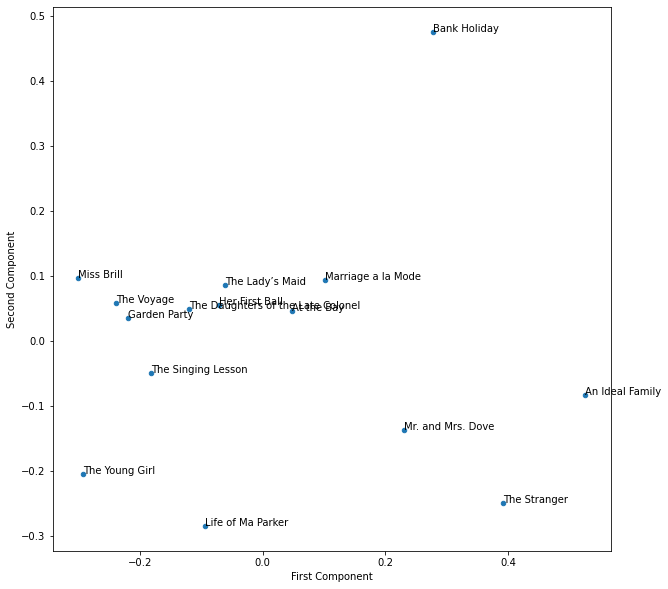

In [43]:
pp_per_story = []
for i in personal_pronouns_per_story:
    joined = ' '.join(i)
    pp_per_story.append(joined)

tfidfVectorizer = TfidfVectorizer(max_features=10000, use_idf=False)
gardenFreq = tfidfVectorizer.fit_transform(pp_per_story).todense()
pd.DataFrame(gardenFreq)

pca = PCA(n_components=2)
gardenReduced = pca.fit_transform(gardenFreq)

df = pd.DataFrame(gardenReduced, 
             columns =["First Component", "Second Component"], 
             index = titles) 
ax = df.plot(kind="scatter", x = "First Component", y="Second Component", figsize = (10,10))
for title, points in df.iterrows():
    ax.annotate(title, points) 

And that brings us to the end of my final project! Thank you so much for reading and I hope you were able to learn something new and interesting :))